# Volumes and Orientations.

## All Right! Let's go a bit deeper.

It is very important to understand the differences and the mapping between the coordinate spaces used in math and in medical imaging. Understanding this mapping does automatically answer most of the frequent questions like 

- Why is my data mirrored?
- Why is the orientation wrong?
- etc...

In the "Hello_Slicer" notebook in order to display the text images in slice views some transformations (flipping and transposing) were involved. Let's do some experiments to figure out what are those transformations.

So as the [https://www.slicer.org/wiki/Coordinate_systems](https://www.slicer.org/wiki/Coordinate_systems) wiki article explains different coordinate systems are used in different environments.

![Coordinate systems](https://www.slicer.org/w/img_auth.php/2/22/Coordinate_sytems.png)

---

Different files and software can have different implementations of the same coordinate space. For example there is ***ijk*** indexing order in Matlab but in numpy the indexing order is ***kji***. There is LPS in DICOM and there's RAS that Slicer uses.

In this notebook we'll focus on ***kji*** because nupmy arrays use this indexing order, and ***RAS*** because Slicer uses it.

In order to understand the coordinate space mapping between numpy and Slicer, let's try visualising it with something simple.

---

### Setup

Let's setup the notebook environment

In [1]:
import os
try:
    import numpy as np
    import JupyterNotebooksLib as slicernb
    import matplotlib
    from matplotlib import pyplot as plt
except ImportError as e:
    print(f'Imports failed with the following message: {e}.\nSlicer environment was not setup correctly.')
matplotlib.use('Agg')

In addition to the standard modules let's import the file containing the utility functions that we create in these notebooks.

In [2]:
sys.path.append(os.getcwd())
import playground_utils

And let's create another utility function that will help us setup plots from arrays.

Keep in mind that util [this](https://github.com/jupyter-xeus/xeus-python/issues/224) issue is fixed we're required to plot Matplotlib plots using the `slicernb.MatplotlibDisplay` helper.

```python
slicernb.MatplotlibDisplay(plt)
```

instead of

```python
plt.show()
```

After the issue is fixed matplotlib should work the same way it works in regular (non slicer) notebooks.

In [3]:
def setup_plot_array(img_array: np.ndarray, dpi: int = 150) -> plt:
    """Setup and return a pyplot."""
    plt.figure(num=1, figsize=(300/dpi, 300/dpi), dpi=dpi)
    plt.imshow(img_array, cmap="gray")
    return plt

---

## Pixels and images

It's easy to understand a pixel. A pixel is a flat colored thing.

#### This is a pixel.

Hello, Malevitch

Image shape is: (1, 1).
[[0]]


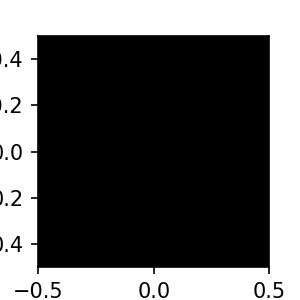

In [4]:
pixel_array = np.arange(0, 1, 1, int)
pixel_array = pixel_array.reshape(pixel_array.shape[0], 1)
print(f'Image shape is: {pixel_array.shape}.\n{pixel_array}')
slicernb.MatplotlibDisplay(setup_plot_array(pixel_array))

And images are sequences of pixels.

### This is a 1D horizoltal image

Image shape is: (1, 3).
[[0 1 2]]


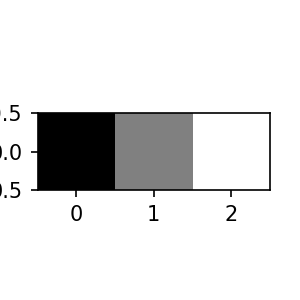

In [5]:
one_d_h_array = np.arange(0, 3, 1, int)
one_d_h_array = one_d_h_array.reshape(1, one_d_h_array.shape[0])
print(f'Image shape is: {one_d_h_array.shape}.\n{one_d_h_array}')
slicernb.MatplotlibDisplay(setup_plot_array(one_d_h_array))

### This is a 1D vertical image

Image shape is: (3, 1).
[[0]
 [1]
 [2]]


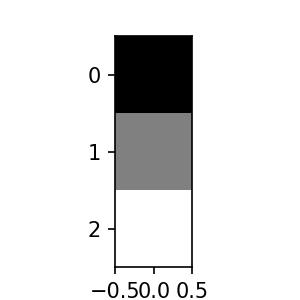

In [6]:
one_d_v_array = np.arange(0, 3, 1, int)
one_d_v_array = one_d_v_array.reshape(one_d_v_array.shape[0], 1)
print(f'Image shape is: {one_d_v_array.shape}.\n{one_d_v_array}')
slicernb.MatplotlibDisplay(setup_plot_array(one_d_v_array))

The images were construcred in image coordinate space thus zero is in the top left corner.

Let's see it on a 2D array.

### This is a 2D image

Image shape is: (3, 3).
[[0 1 2]
 [3 4 5]
 [6 7 8]]


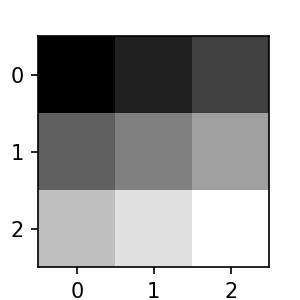

In [7]:
two_d_array = np.arange(0, 9, 1, int)
two_d_array = two_d_array.reshape(3, 3)
print(f'Image shape is: {two_d_array.shape}.\n{two_d_array}')
slicernb.MatplotlibDisplay(setup_plot_array(two_d_array))

---

## 3D

As we embark the world of 3D images and objects, let's try looking at the coordinate systems using a 3x3x3 array. The Rubik's cube is a nice example of such an array. It has 9 elements (one of them, the central one, doesn't move though), each face has a color and we can unwrap it to agree on the side names.

![RK](img/rubiks_cube.jpg)

- A *side* is an edge slice of the array (a face of the Rubik's cube).
- A *camera* is the observer. Front of the camera is where the "lens" is.
- The *camera position* is the viewpoint from which the observer is looking at the object (our cube)
- When the *camera position is outside* it means that we're looking at a cube side from outside of the cube.

---

But there is a significant difference between an array and a cube object in space. An array is just a sequence of numbers that can be represented as a given shape, when a cube is not only an array of numbers that represent some data points but also a set of coordinated where those numbers are located in space. 


Note: The following explanation might look like an over-simplification. Now let's look at a 3D array (our cube).

We'll use array element indexes as their coordinates in space. Also, in the accompanying illustrations the camera uses the same color code as the Rubik's cube to simplify the orientation visualization.

![Camera](img/cam.svg)

### This is a 3D image

In [8]:
cube_array = np.arange(0, 27, 1, float)
cube_array = cube_array.reshape(3, 3, 3)
print(f'Image shape is: {cube_array.shape}.\n{cube_array}')

Image shape is: (3, 3, 3).
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]]


---

#### This is the front slice of the volume.

![Front](img/f.svg)

In [9]:
cube_array[0, :, :]

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

The **ji** slice number 0. 
The green (F) side of the Rubik's cube. The camera is outside.

---

#### This is the top slice.

![Up](img/t.svg)

In [10]:
cube_array[:, 0, :]

array([[ 0.,  1.,  2.],
       [ 9., 10., 11.],
       [18., 19., 20.]])

The **ki** slice number 0. The White (U) side of the Rubik's cube. The camera is **inside**. Note that if we would want to put text there it would appear upside down.

---

#### This is the left slice.

![L](img/l.svg)

In [11]:
cube_array[:, :, 0]

array([[ 0.,  3.,  6.],
       [ 9., 12., 15.],
       [18., 21., 24.]])

The **kj** slice number 0. The orange (L) side of the Rubik's cube. The camera is inside. Note how the camera is tilted 90 degrees to the left.

---

## From arrays to medical images

The mentioned wiki article ([https://www.slicer.org/wiki/Coordinate_systems](https://www.slicer.org/wiki/Coordinate_systems)) explains how the *ijk* coordinate system transforms to the RAS coordinate system that's used by Slicer. A basic explataion of the difference between the two is that *ijk*  (Image coordinate system) treats our volume as an array while RAS (Anatomical coordinate system) treats our volume as a physical object in space. 

RAS (Right, Anterior, Superior) is similar to LPS with the first two axes flipped and used by 3D Slicer

- R (right)    -> from left towards right
- A (anterior) -> from posterior towards anterior
- S (superior) -> from inferior towards superior

![IJtoRS](https://www.slicer.org/w/img_auth.php/thumb/4/40/IJtoRS.png/1100px-IJtoRS.png)

Standard slices Medical images use the Anatomical coordinate system (also called patient coordinate system). The anatomical space consists of three planes to describe the standard anatomical position of a human:

- the axial plane is parallel to the ground
- the coronal plane is perpendicular to the ground and separates the front (Anterior) from the back (Posterior)
- the sagittal plane is perpendicular to the ground and separates the Left from the Right

---



So if we ~~take a CT scan of the Rubik's cube~~ import our cube array as a volume to slicer without applying any transformations we can expect that the image will be rendered.


Let's import the `cube_array` to Slicer and slice it.

In [12]:
volumeNode = slicer.util.addVolumeFromArray(cube_array)
volumeNode.SetName('My Cube')

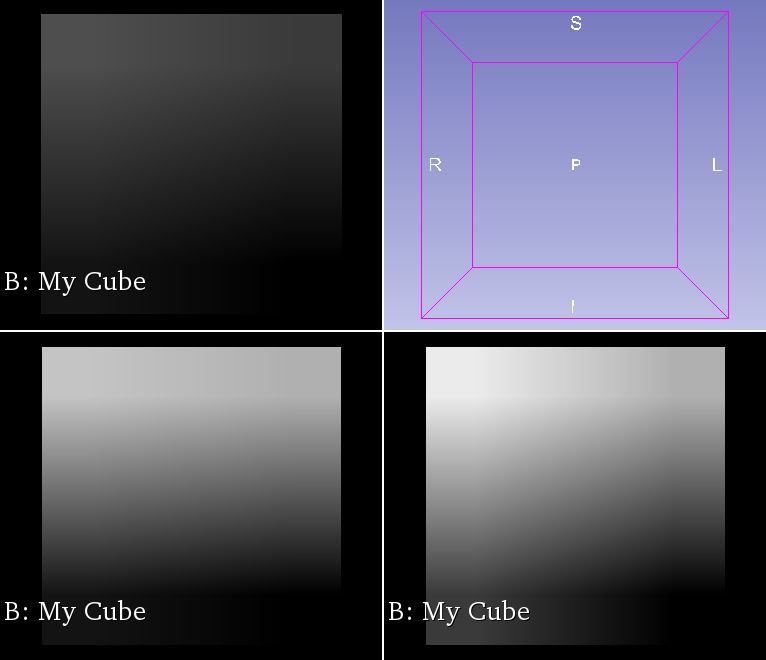

In [13]:
visible_slice_num = 0

for sliceView in ['Red', 'Green', 'Yellow']:
    playground_utils.show_slice_in_slice_view(volumeNode, visible_slice_num, sliceView)
slicernb.ViewDisplay('FourUp', False)

OK, it clearly flipped. In order to analyze this image let's turn off the pixel intensity interpolation to see the intensities of individual voxels.

In [14]:
for node in slicer.util.getNodes('*').values():
    if node.IsA('vtkMRMLScalarVolumeDisplayNode'):
        node.SetInterpolate(0)
lm = slicer.app.layoutManager()

---

Whithout any applied transformations the "front" side of out Rubik's cube is:

In [15]:
print(cube_array[0,:,:])

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


When the "front" (Max slice number in the coronal plane) of the RAS array is:

In [16]:
print(np.flip(np.rot90(cube_array, 1, (0, 1)),
              axis=(1,2))[0,:,:])

playground_utils.show_slice_in_slice_view(volumeNode, cube_array.shape[0]-1, 'Green')
view = lm.sliceWidget('Green').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Green widget\nCoronal\nSlice: {cube_array.shape[0]-1}')
slicernb.ViewSliceBaseWidget('Green')

[[26. 25. 24.]
 [17. 16. 15.]
 [ 8.  7.  6.]]


ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01*\x08\x06\x00\x00\x00\…

---

### Where are the Cube sides in RAS now?

This transformation tells us that we should be looking for the flipped version of the Rubik's "front" where the inferior slice of the Volume is in Slicer.

In [17]:
transformed_array = np.flip(np.rot90(cube_array, 1, (0, 1)), axis=(1, 2))

Since an affine transformation is can be represented as the composition of a linear transformations and translations, we can try to represent the ijk-to-RAS transformation as a composition of translation reflection and rotation.

So our cube transformation from numpy to Slicer is a counter-clockwise 90 degee rotation in the **kj** plane followed by flipping **j** and **i**.


#### Front -> Bottom

The minimum slice number in the axial projection.

In [18]:
print(f'kji in numpy.\nFront:\n{cube_array[0, :, :]}\n')
print(f'RAS in Slicer.\nBottom:\n{transformed_array[:, 2, :]}\n')

playground_utils.show_slice_in_slice_view(volumeNode, 0, 'Red')
view = lm.sliceWidget('Red').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Red slice\nAxial\nSlice: 0')
slicernb.ViewSliceBaseWidget('Red')

kji in numpy.
Front:
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]

RAS in Slicer.
Bottom:
[[8. 7. 6.]
 [5. 4. 3.]
 [2. 1. 0.]]



ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01,\x08\x06\x00\x00\x00\…

#### Top -> Back

That's the minimum slice number in the coronal projection.

In [19]:
print(f'kji in numpy.\nTop:\n{cube_array[:, 0, :]}\n')
print(f'RAS in Slicer.\nBack:\n{transformed_array[2 , : , :]}\n')

playground_utils.show_slice_in_slice_view(volumeNode, 0, 'Green')
view = lm.sliceWidget('Green').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Green wigdet\nCoronal\nSlice: 0')
slicernb.ViewSliceBaseWidget('Green')

kji in numpy.
Top:
[[ 0.  1.  2.]
 [ 9. 10. 11.]
 [18. 19. 20.]]

RAS in Slicer.
Back:
[[20. 19. 18.]
 [11. 10.  9.]
 [ 2.  1.  0.]]



ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01*\x08\x06\x00\x00\x00\…

#### Left -> Right

That's the maximum slice number in the sagittal projection.

In [20]:
print(f'kji in numpy.\nLeft:\n{cube_array[:, :, 0]}\n')
print(f'RAS in Slicer.\nRight:\n{transformed_array[:, :, 2].T}\n')

playground_utils.show_slice_in_slice_view(volumeNode, 0, 'Yellow')
view = lm.sliceWidget('Yellow').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Yellow wigdet\nSagittal\nSlice: 2')
slicernb.ViewSliceBaseWidget('Yellow')

kji in numpy.
Left:
[[ 0.  3.  6.]
 [ 9. 12. 15.]
 [18. 21. 24.]]

RAS in Slicer.
Right:
[[24. 21. 18.]
 [15. 12.  9.]
 [ 6.  3.  0.]]



ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01*\x08\x06\x00\x00\x00\…

---

To reinforce the understanding of coordinate space transformations let's create a volume and add the letters representing sides of the cube.

In [21]:
cube_textures = {}
for rk_side in ['F', 'B', 'U', 'D', 'L', 'R']:
    cube_textures[rk_side] = playground_utils.create_np_text_img(text=rk_side, font_size=64)

In [22]:
volume = np.zeros((128, 128, 128))

volume[:1, :, :] = cube_textures['F'].reshape(1, 128, 128)
volume[-1:, :, :] = cube_textures['B'].reshape(1, 128, 128)
volume[:, :1, :] = cube_textures['U'].reshape(128, 1, 128)
volume[:, -1:, :] = cube_textures['D'].reshape(128, 1, 128)
volume[:, :, :1] = cube_textures['R'].reshape(1, 128, 128).T
volume[:, :, -1:] = cube_textures['L'].reshape(1, 128, 128).T

transformed_volume = np.flip(np.rot90(volume, 1, (0, 1)), axis=(1, 2))

In [23]:
volumeNode = slicer.util.addVolumeFromArray(transformed_volume)
volumeNode.SetName('RAS')

In [24]:
playground_utils.show_slice_in_slice_view(volumeNode, 127, 'Green')
view = lm.sliceWidget('Green').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Green wigdet\nCoronal\nSlice: 127')
slicernb.ViewSliceBaseWidget('Green')

ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01*\x08\x06\x00\x00\x00\…

In [25]:
playground_utils.show_slice_in_slice_view(volumeNode, 127, 'Yellow')
view = lm.sliceWidget('Yellow').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Yellow wigdet\nSagittal\nSlice: 127')
slicernb.ViewSliceBaseWidget('Yellow')

ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01*\x08\x06\x00\x00\x00\…

In [26]:
playground_utils.show_slice_in_slice_view(volumeNode, 127, 'Red')
view = lm.sliceWidget('Red').sliceView()
view.cornerAnnotation().SetText(vtk.vtkCornerAnnotation.UpperRight,f'Red wigdet\nAxial\nSlice: 127')
slicernb.ViewSliceBaseWidget('Red')

ViewSliceBaseWidget(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01~\x00\x00\x01,\x08\x06\x00\x00\x00\…

---

Now that the orientation of the data in Slicer is less of a "black box" let's continue to play with the Slicer API using some real MI data.

Continue in the next notebook.